##Importing required libraries

In [128]:
import pandas as pd

In [129]:
import numpy as np

##Load the dataset

In [130]:
df=pd.read_csv("/content/loan_data_set.csv")

In [131]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##Data Preprocessing

In [132]:
df.shape

(614, 13)

In [133]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [135]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [136]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [137]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [138]:
#Dropping unwanted column
df=df.drop("Gender",axis=1)
df=df.drop("Loan_ID",axis=1)
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [139]:
#Replacing null values

df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [140]:
df.isnull().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [141]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [142]:
le = LabelEncoder()

In [144]:
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [145]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [146]:
df.corr()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Married,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556
Property_Area,0.004257,-0.000244,-0.065243,-0.030860,-0.009500,0.010522,-0.046632,-0.076120,0.001963,1.000000,0.032112


<Axes: >

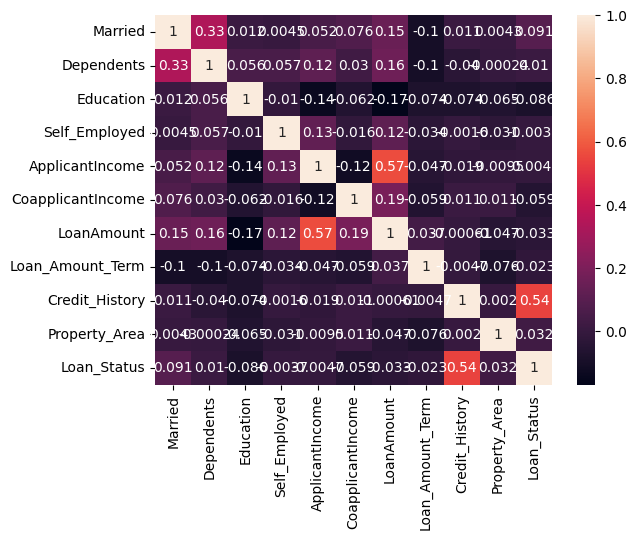

In [147]:
sns.heatmap(df.corr(),annot=True)

##Visualzation

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

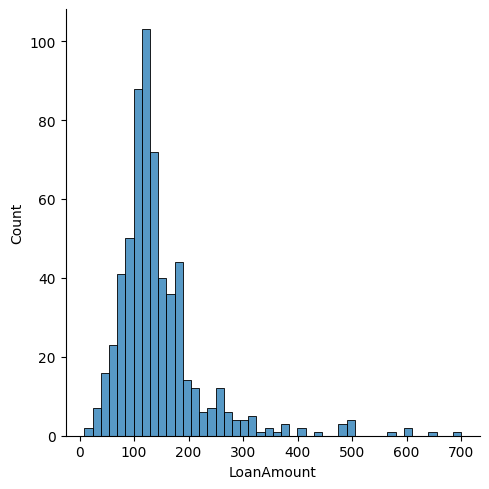

In [149]:
sns.displot(df.LoanAmount)

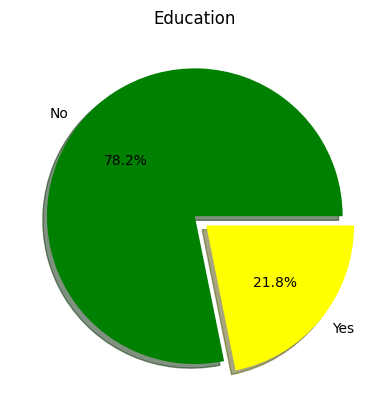

In [150]:
plt.pie(df.Education.value_counts(),[0,0.1],labels=["No","Yes"],autopct= '%1.1f%%',shadow=True,colors=['Green','yellow'])
plt.title('Education')
plt.show()

<Axes: ylabel='Married'>

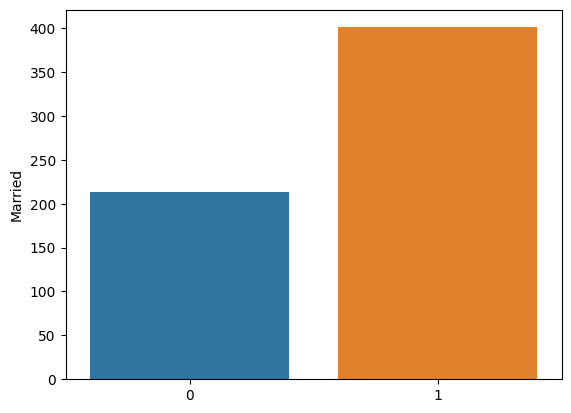

In [151]:
sns.barplot(x=df.Married.value_counts().index, y=df.Married.value_counts())

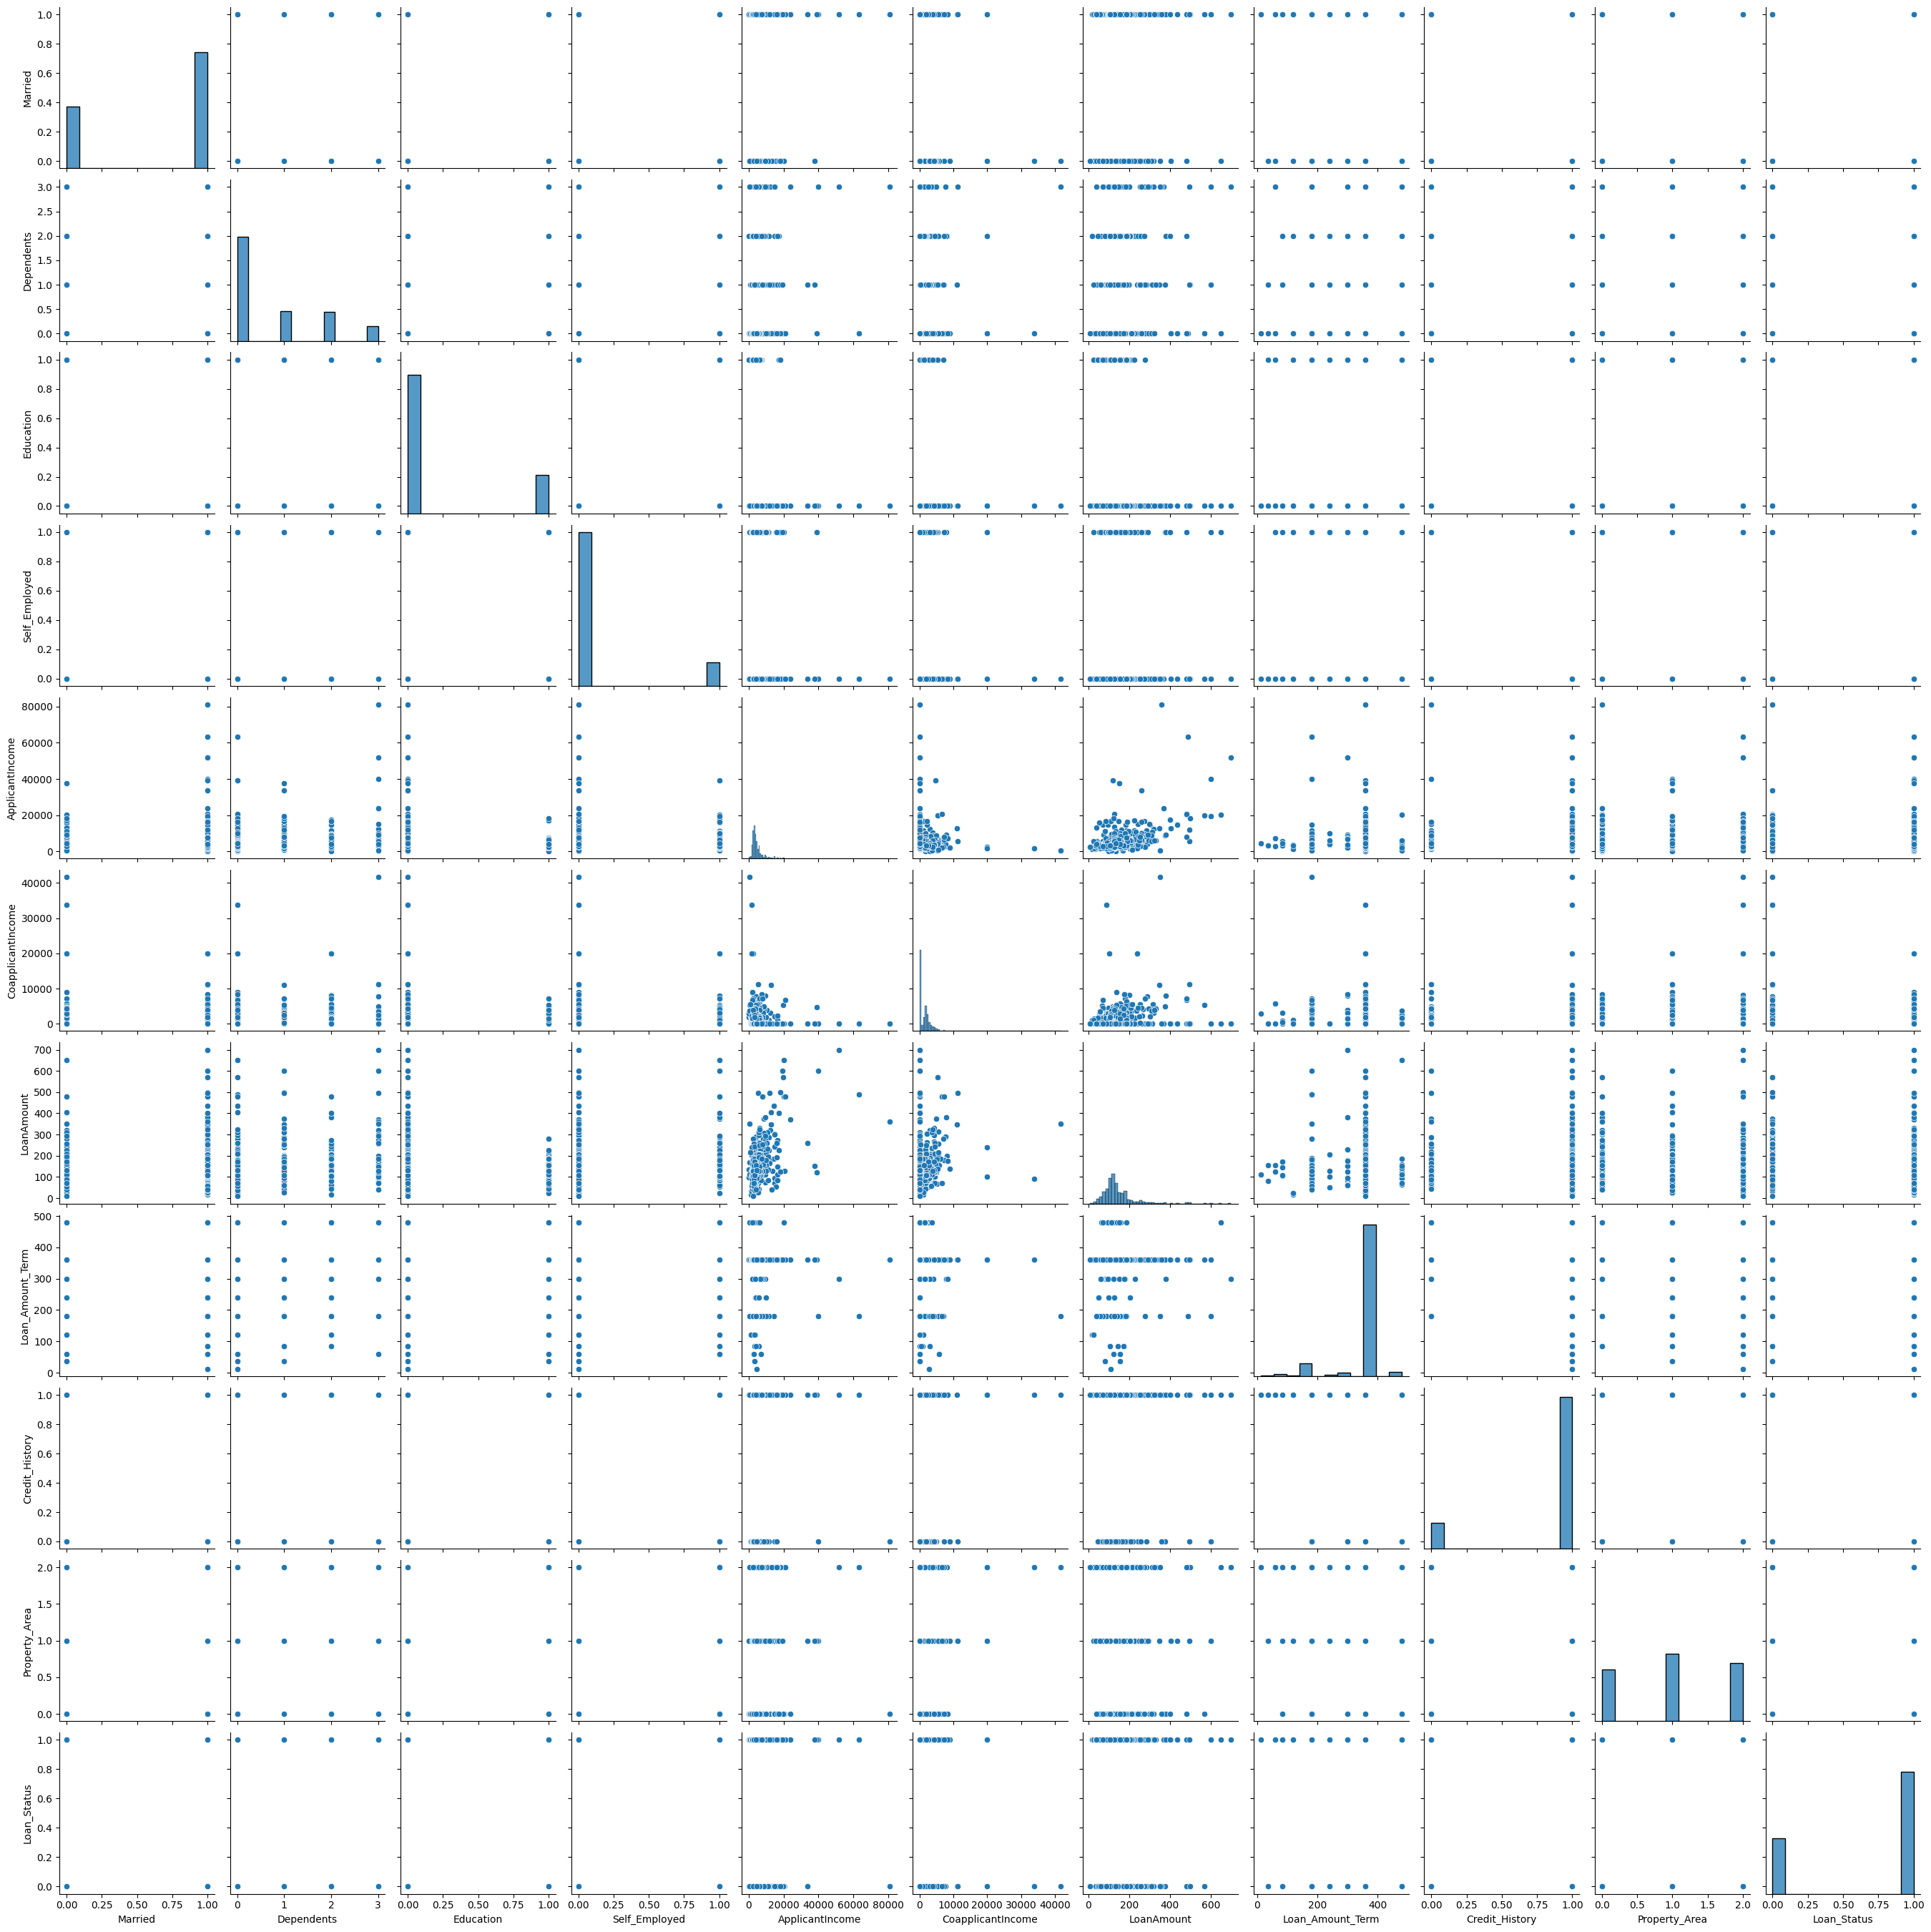

In [152]:
sns.pairplot(df)

##X and Y split


In [95]:
#x for independent variable and y for dependent variable

In [153]:
y=df['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [154]:
x=df.drop(columns=['Loan_Status'],axis=1)
x.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


##Scaling on independent variables

In [155]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
scale=MinMaxScaler()

In [157]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)

In [158]:
x_scaled.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0
1,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
2,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0
3,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
4,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


##Train Test Split

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [161]:
x_train.shape

(429, 10)

In [162]:
x_test.shape

(185, 10)

##Model Building

In [163]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [164]:
model.fit(x_train,y_train)

LogisticRegression()

In [165]:
pred=model.predict(x_test)
pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [166]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
242    1
515    1
582    1
225    0
134    1
Name: Loan_Status, Length: 185, dtype: int64

##Evaluation for classification Model

In [167]:
## Accuracy score
from sklearn.metrics import accuracy_score

In [168]:
accuracy_score(y_test,pred)

0.827027027027027

In [169]:
## Confusion Metrix
from sklearn.metrics import confusion_matrix

In [170]:
confusion_matrix(y_test,pred)

array([[ 21,  30],
       [  2, 132]])

In [171]:
pd.crosstab(y_test,pred)

col_0,0,1
Loan_Status,,
0,21,30
1,2,132


In [172]:
# TN  FP
# FN  TP

In [173]:
## Classification Report
from sklearn.metrics import classification_report

In [174]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [175]:
## ROC-AUC Score
probability = model.predict_proba(x_test)[:,1]
probability

array([0.73324012, 0.7392073 , 0.78153916, 0.8117622 , 0.83742768,
       0.0731057 , 0.8362921 , 0.6989431 , 0.09347697, 0.7876727 ,
       0.74265228, 0.81404085, 0.71614934, 0.81573443, 0.80703279,
       0.84226592, 0.64049125, 0.63324423, 0.75230004, 0.09744707,
       0.14673938, 0.78877496, 0.81167124, 0.80876615, 0.78044689,
       0.79959706, 0.70634822, 0.77259339, 0.19110125, 0.10533426,
       0.78893514, 0.62983925, 0.73934464, 0.76781711, 0.78714106,
       0.0862311 , 0.7815633 , 0.60460334, 0.80009817, 0.77030194,
       0.76507234, 0.17042063, 0.85827655, 0.75768377, 0.74421084,
       0.68977002, 0.82069102, 0.7389151 , 0.79658432, 0.70068546,
       0.79743619, 0.80999257, 0.68967767, 0.70627296, 0.77052813,
       0.76717708, 0.81617156, 0.61559812, 0.84535008, 0.71476245,
       0.08623691, 0.72686122, 0.73324658, 0.11863883, 0.83811443,
       0.79830215, 0.77012491, 0.72437541, 0.76074441, 0.63390497,
       0.69983054, 0.79672146, 0.7373551 , 0.76424727, 0.79219

In [176]:
from sklearn.metrics import roc_auc_score, roc_curve

In [177]:
# roc_curve
fpr,tpr,thresholds = roc_curve(y_test,probability)

Text(0.5, 1.0, 'ROC CURVE')

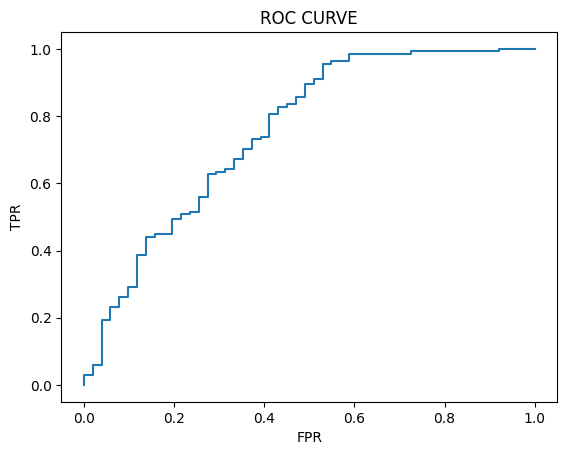

In [178]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [179]:
# AUC Score
roc_auc_score(y_test,probability)

0.7538776704711735

In [182]:
model.predict([[1,2,0,6550,0,1000,10000,360,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [183]:
model.predict([[1,0,1,4500,0,500,500,360,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [184]:
model.predict([[0,0,0,0,5800,0.0,140.0,360.0,1.0,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

##Save the model

In [186]:
# Import the pickle library and dump the model as .pkl file
#This is done to save the model
import pickle
pickle.dump(model,open('Loan.pkl','wb'))